In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def initialize_grid(M, N):
    """
    Inicializa la grilla y las matrices T, T_new y source para el proceso de iteración.

    Parámetros:
    - M (int): Número de pasos en el eje x.
    - N (int): Número de pasos en el eje y.

    Retorna:
    - X (ndarray): Matriz de coordenadas x de la grilla.
    - Y (ndarray): Matriz de coordenadas y de la grilla.
    - T (ndarray): Matriz inicializada con condiciones de contorno.
    - T_new (ndarray): Matriz para almacenar valores actualizados durante la iteración.
    - source (ndarray): Término fuente inicializado en ceros.
    """
    # Rango del espacio
    x0, xf = 0.0, 1.0
    y0, yf = 0.0, 1.0

    # Tamaño de la grilla
    h = (xf - x0) / M
    k = (yf - y0) / N

    # Creación de la grilla
    x = np.linspace(x0, xf, M + 1)
    y = np.linspace(y0, yf, N + 1)
    X, Y = np.meshgrid(x, y)

    # Inicialización de matrices
    T = np.zeros((len(Y), len(X)))
    T_new = np.zeros((len(Y), len(X)))
    source = np.zeros((len(Y), len(X)))

    # Condiciones de contorno
    T[-1, :] = 0
    T[0, :] = 0
    T[:, -1] = np.power(x, 1)
    T[:, 0] = 0

    return X, Y, T, T_new, source

def poisson_fuente(X, Y):
    """
    Función que define la forma del término fuente en la ecuación de Poisson.
    En este caso, se asume una distribución Gaussiana.

    Parámetros:
    - X (ndarray): Matriz de coordenadas x de la grilla.
    - Y (ndarray): Matriz de coordenadas y de la grilla.

    Retorna:
    - G (ndarray): Matriz con los valores del término fuente.
    """
    mu, sigma = 0.5, 0.1
    G = np.exp(-((X - mu)**2 + (Y - mu)**2) / (2.0 * sigma**2)) / (np.sqrt(2 * np.pi * sigma))

    # Condiciones de contorno para la fuente
    G[-1, :] = 0
    G[0, :] = 0
    G[:, -1] = 0
    G[:, 0] = 0
    return G

def solve_poisson(T, source, M, N, h, k, tol=1e-6):
    """
    Aproximación de la solución de la ecuación de Poisson utilizando el método de diferencias finitas.

    Parámetros:
    - T (ndarray): Matriz inicial
    - source (ndarray): Término fuente.
    - M (int): Número de pasos en el eje x.
    - N (int): Número de pasos en el eje y.
    - h (float): Tamaño del paso en x.
    - k (float): Tamaño del paso en y.
    - tol (float): Tolerancia para el criterio de convergencia.

    Retorna:
    - T (ndarray): Matriz con la solución aproximada.
    """
    e = 8.85e-12  # Permitividad eléctrica
    constante = 1 / e
    delta = 1.0

    while delta > tol:
        S1 = []
        # Iteración sobre los puntos internos
        for i in range(1, M):
            for j in range(1, N):
                T_new = (
                    ((T[i + 1, j] + T[i - 1, j]) * k**2) +
                    ((T[i, j + 1] + T[i, j - 1]) * h**2) -
                    (constante * source[i, j] * h**2 * k**2)
                ) / (2 * (h**2 + k**2))

                # Actualizar el valor en T_new y calcular la diferencia
                S1.append(np.abs(T_new - T[i, j]))
                T[i, j] = T_new

        # Verificar tolerancia
        delta = max(S1)

    return T

# Ejemplo de uso
M = N = 50
X, Y, T, _, _ = initialize_grid(M, N)
h = (1.0 - 0.0) / M
k = (1.0 - 0.0) / N

# Definir el término fuente
source = poisson_fuente(X, Y)

# Solucionar la ecuación de Poisson
T_solution = solve_poisson(T, source, M, N, h, k)


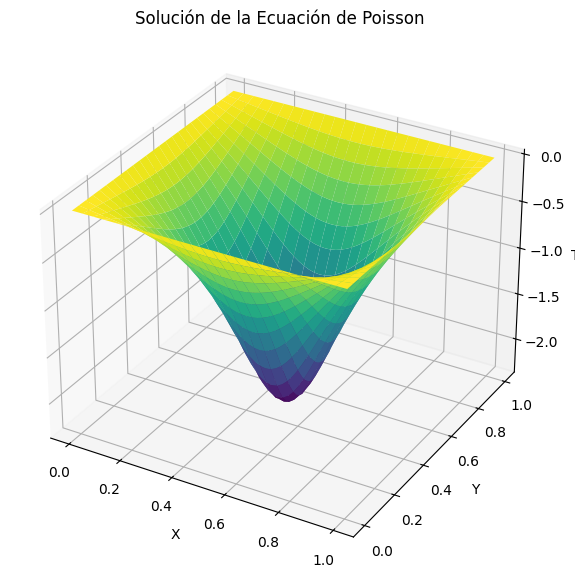

In [2]:
def plot_3d_solution(X, Y, T):
    """
    Grafica la solución T(X, Y) en 3D.

    Parámetros:
    - X (ndarray): Matriz de coordenadas x de la grilla.
    - Y (ndarray): Matriz de coordenadas y de la grilla.
    - T (ndarray): Matriz con la solución de la ecuación de Poisson.
    """
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, T, cmap='viridis', edgecolor='none')

    ax.set_title('Solución de la Ecuación de Poisson')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('T')

    plt.show()

# Ejemplo de uso
M = N = 50
X, Y, T, _, _ = initialize_grid(M, N)
h = (1.0 - 0.0) / M
k = (1.0 - 0.0) / N

# Definir el término fuente
source = poisson_fuente(X, Y)

# Solucionar la ecuación de Poisson
T_solution = solve_poisson(T, source, M, N, h, k)

# Graficar la solución en 3D
plot_3d_solution(X, Y, T_solution)


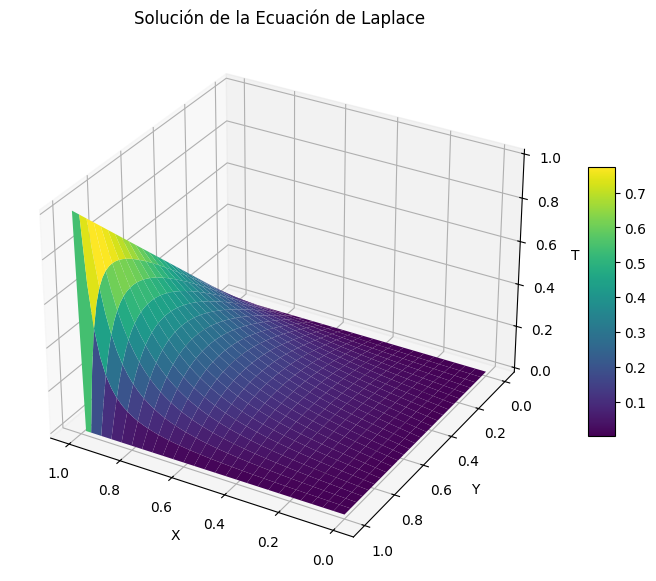

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def initialize_grid(M, N):
    """
    Inicializa la grilla y las matrices T y T_new para el proceso de iteración.

    Parámetros:
    - M (int): Número de pasos en el eje x.
    - N (int): Número de pasos en el eje y.

    Retorna:
    - X (ndarray): Matriz de coordenadas x de la grilla.
    - Y (ndarray): Matriz de coordenadas y de la grilla.
    - T (ndarray): Matriz inicializada con condiciones de contorno.
    - h (float): Tamaño del paso en x.
    - k (float): Tamaño del paso en y.
    """
    # Rango del espacio
    x0, xf = 0.0, 1.0
    y0, yf = 0.0, 1.0

    # Tamaño de la grilla
    h = (xf - x0) / M
    k = (yf - y0) / N

    # Creación de la grilla
    x = np.linspace(x0, xf, M + 1)
    y = np.linspace(y0, yf, N + 1)
    X, Y = np.meshgrid(x, y)

    # Inicialización de matrices
    T = np.zeros((len(Y), len(X)))

    # Condiciones de contorno para T
    T[-1, :] = 0             # Borde superior
    T[0, :] = 0              # Borde inferior
    T[:, -1] = np.power(x, 1)  # Borde derecho
    T[:, 0] = 0              # Borde izquierdo

    return X, Y, T, h, k

def solve_laplace(T, M, N, h, k, tol=1e-6):
    """
    Soluciona la ecuación de Laplace usando diferencias finitas.

    Parámetros:
    - T (ndarray): Matriz inicial de temperatura.
    - M (int): Número de pasos en el eje x.
    - N (int): Número de pasos en el eje y.
    - h (float): Tamaño del paso en x.
    - k (float): Tamaño del paso en y.
    - tol (float): Tolerancia para el criterio de convergencia.

    Retorna:
    - T (ndarray): Matriz con la solución aproximada.
    """
    delta = 1.0

    while delta > tol:
        S1 = []

        for i in range(1, M):
            for j in range(1, N):
                T_new = (
                    (T[i + 1, j] + T[i - 1, j]) * k**2 +
                    (T[i, j + 1] + T[i, j - 1]) * h**2
                ) / (2 * (h**2 + k**2))

                # Registrar la diferencia para el criterio de convergencia
                S1.append(np.abs(T_new - T[i, j]))

                # Actualizar el valor en T
                T[i, j] = T_new

        # Verificar la tolerancia
        delta = max(S1)

    return T

def plot_3d_solution(X, Y, T):
    """
    Grafica la solución T(X, Y) en 3D con interacción habilitada.

    Parámetros:
    - X (ndarray): Matriz de coordenadas x de la grilla.
    - Y (ndarray): Matriz de coordenadas y de la grilla.
    - T (ndarray): Matriz con la solución de la ecuación de Laplace.
    """
    plt.ion()  # Habilitar interacción
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(X, Y, T, cmap='viridis', edgecolor='none')

    ax.set_title('Solución de la Ecuación de Laplace')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('T')

    # Barra de color
    fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)

    # Habilitar rotación
    ax.view_init(elev=30, azim=120)  # Ángulo inicial
    plt.show(block=True)  # Permitir interacción hasta que se cierre la ventana

# Ejemplo de uso
M = N = 50
X, Y, T, h, k = initialize_grid(M, N)

# Solucionar la ecuación de Laplace
T_solution = solve_laplace(T, M, N, h, k)

# Graficar la solución en 3D con rotación
plot_3d_solution(X, Y, T_solution)

In [ ]:
# Instalación de Plotly en Google Colab (ejecutar una sola vez)
!pip install plotly

import numpy as np
import plotly.graph_objs as go

def initialize_grid(M, N):
    """
    Inicializa la grilla y las matrices T y T_new para el proceso de iteración.

    Parámetros:
    - M (int): Número de pasos en el eje x.
    - N (int): Número de pasos en el eje y.

    Retorna:
    - X (ndarray): Matriz de coordenadas x de la grilla.
    - Y (ndarray): Matriz de coordenadas y de la grilla.
    - T (ndarray): Matriz inicializada con condiciones de contorno.
    - h (float): Tamaño del paso en x.
    - k (float): Tamaño del paso en y.
    """
    # Rango del espacio
    x0, xf = 0.0, 1.0
    y0, yf = 0.0, 1.0

    # Tamaño de la grilla
    h = (xf - x0) / M
    k = (yf - y0) / N

    # Creación de la grilla
    x = np.linspace(x0, xf, M + 1)
    y = np.linspace(y0, yf, N + 1)
    X, Y = np.meshgrid(x, y)

    # Inicialización de matrices
    T = np.zeros((len(Y), len(X)))

    # Condiciones de contorno para T
    T[-1, :] = 0             # Borde superior
    T[0, :] = 0              # Borde inferior
    T[:, -1] = np.power(x, 1)  # Borde derecho
    T[:, 0] = 0              # Borde izquierdo

    return X, Y, T, h, k

def solve_laplace(T, M, N, h, k, tol=1e-6):
    """
    Soluciona la ecuación de Laplace usando diferencias finitas.

    Parámetros:
    - T (ndarray): Matriz inicial de temperatura.
    - M (int): Número de pasos en el eje x.
    - N (int): Número de pasos en el eje y.
    - h (float): Tamaño del paso en x.
    - k (float): Tamaño del paso en y.
    - tol (float): Tolerancia para el criterio de convergencia.

    Retorna:
    - T (ndarray): Matriz con la solución aproximada.
    """
    delta = 1.0

    while delta > tol:
        S1 = []

        for i in range(1, M):
            for j in range(1, N):
                T_new = (
                    (T[i + 1, j] + T[i - 1, j]) * k**2 +
                    (T[i, j + 1] + T[i, j - 1]) * h**2
                ) / (2 * (h**2 + k**2))

                # Registrar la diferencia para el criterio de convergencia
                S1.append(np.abs(T_new - T[i, j]))

                # Actualizar el valor en T
                T[i, j] = T_new

        # Verificar la tolerancia
        delta = max(S1)

    return T

def plot_3d_solution(X, Y, T):
    """
    Grafica la solución T(X, Y) en 3D utilizando Plotly para interacción en Colab.

    Parámetros:
    - X (ndarray): Matriz de coordenadas x de la grilla.
    - Y (ndarray): Matriz de coordenadas y de la grilla.
    - T (ndarray): Matriz con la solución de la ecuación de Laplace.
    """
    # Crear la figura en Plotly
    fig = go.Figure(data=[go.Surface(z=T, x=X, y=Y, colorscale='Viridis')])
    fig.update_layout(
        title='Solución de la Ecuación de Laplace',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='T'
        ),
        width=800,
        height=600
    )

    fig.show()

# Parámetros
M = N = 50
X, Y, T, h, k = initialize_grid(M, N)

# Solucionar la ecuación de Laplace
T_solution = solve_laplace(T, M, N, h, k)

# Graficar la solución en 3D con interacción
plot_3d_solution(X, Y, T_solution)
